<a href="https://colab.research.google.com/github/girotodenis/python/blob/master/RelatorioTesteCarga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
%%capture
from math import trunc
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt   
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline  

py.init_notebook_mode(connected=False)

In [ ]:
df = pd.read_csv('/content/acesso_prod_tempo_dia_14_mes_11.csv')
df['SEGUNDO'] = df['SEGUNDO'].apply(trunc)
df['hour_min'] = df['HORA'].astype(dtype='str') + df['MINUTO'].astype(dtype='str')
df['hour_sec'] = df['HORA'].astype(dtype='str') + df['MINUTO'].astype(dtype='str')+ df['SEGUNDO'].astype(dtype='str')
df = df.sort_values(['hour_sec'],ascending = (True))
print(df.shape)
df.head()



In [67]:
df = df[((df['HORA']>8)&(df['HORA']<12))]

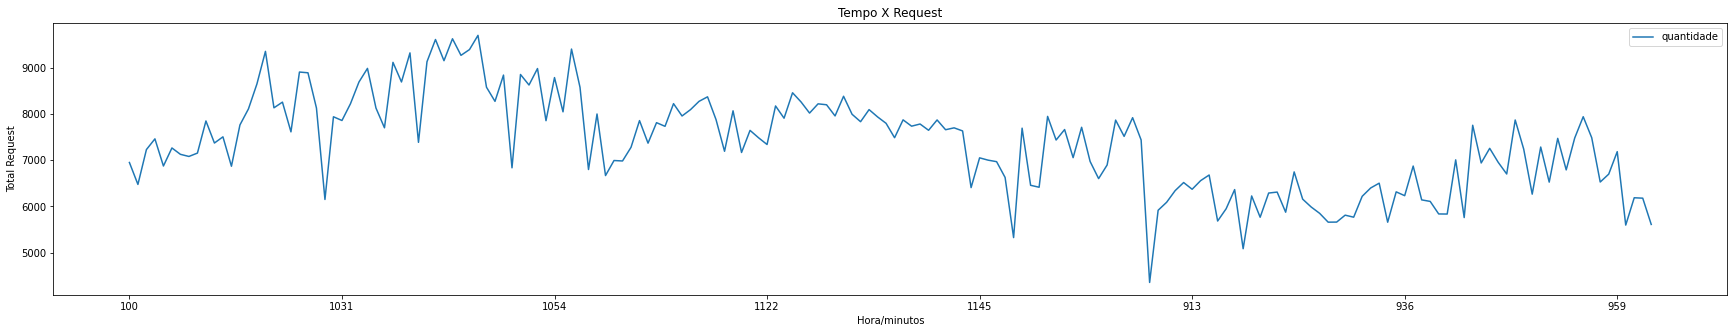

In [68]:
df2 = df.groupby(['hour_min']).size().reset_index(name='quantidade')
fig, ax = plt.subplots(figsize=(30,5))
ax = df2.plot(ax=ax, kind='line', x='hour_min', y='quantidade', xlabel="Hora/minutos", ylabel="Total Request", title="Tempo X Request")
plt.legend(loc='best')
plt.show()



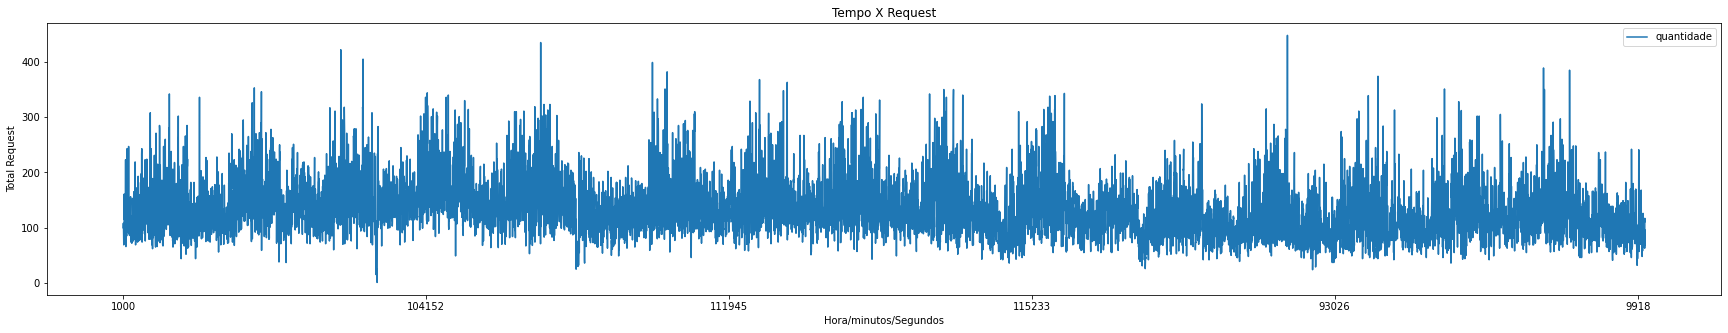

In [69]:
df2 = df.groupby(['hour_sec']).size().reset_index(name='quantidade')
fig, ax = plt.subplots(figsize=(30,5))
ax = df2.plot(ax=ax, kind='line', x='hour_sec', y='quantidade', xlabel="Hora/minutos/Segundos", ylabel="Total Request", title="Tempo X Request")
plt.legend(loc='best')
plt.show()

In [45]:

df = pd.read_csv('/content/epol-teste-consultas-menu.csv')

df.success.astype(str)
df.success.replace('False','false')
df.success.replace('f','false')
df.success.replace('True	','true	')
df['time'] = df['timeStamp'].values.astype(dtype='datetime64[ms]')
df['hour_min'] = df['time'].dt.hour.astype(dtype='str') + df['time'].dt.minute.astype(dtype='str')
df['hour_sec'] = df['time'].dt.hour.astype(dtype='str') + df['time'].dt.minute.astype(dtype='str')+ df['time'].dt.second.astype(dtype='str')
df['minute'] = df['time'].dt.minute
df = df.sort_values(['timeStamp','label'],ascending = (True, True))
#df.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3,8) have mixed types.Specify dtype option on import or set low_memory=False.



AttributeError: ignored

In [43]:
print(df.shape)
df.head(5)

(157141, 8)


,,,,,,,,,8,2345,2404,2404.1,http://epol-rest-epol-hom.apps.ocpdev.pf.gov.br/epol-server/api/peca/listarPecasComCasosEMarcadores?paginaAtual=1&pesquisaTextual=que&tamanhoPagina=50&tipoCaso=MARCADORES,393,0,0.1
1639087152021,175,Minhas Colunas Desmarcadas,200,OK,Thread Group 1-749,text,True,NaN,332.0,2260.0,2404.0,2404.0,http://epol-rest-epol-hom.apps.ocpdev.pf.gov.b...,175.0,0.0,0.0
1639087151806,393,Meus Casos (primeira página),200,OK,Thread Group 1-461,text,True,NaN,45031.0,2251.0,2404.0,2404.0,http://epol-rest-epol-hom.apps.ocpdev.pf.gov.b...,384.0,0.0,0.0
1639087144089,8112,Login,200,OK,Thread Group 1-623,text,True,NaN,3639.0,469.0,2404.0,2404.0,https://sistemashom.dpf.gov.br/auth/realms/sis...,8112.0,0.0,7957.0
1639087142373,9828,Login,200,OK,Thread Group 1-197,text,True,NaN,3676.0,468.0,2404.0,2404.0,https://sistemashom.dpf.gov.br/auth/realms/sis...,9828.0,0.0,2515.0
1639087151847,354,Meus Casos (primeira página),200,OK,Thread Group 1-726,text,True,NaN,56765.0,2261.0,2404.0,2404.0,http://epol-rest-epol-hom.apps.ocpdev.pf.gov.b...,343.0,0.0,0.0


In [44]:
df2 = df.groupby(['hour_min']).size().reset_index(name='quantidade')
fig, ax = plt.subplots(figsize=(10,5))
ax = df2.plot(ax=ax, kind='line', x='hour_min', y='quantidade', xlabel="Hora/minutos", ylabel="Total Request", title="Tempo X Request")
plt.legend(loc='best')
plt.show()

KeyError: ignored

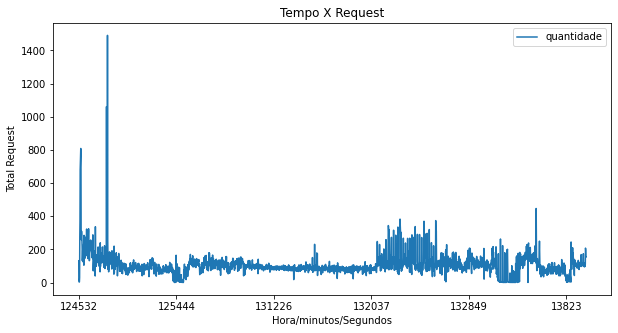

In [39]:

df2 = df.groupby(['hour_sec']).size().reset_index(name='quantidade')
fig, ax = plt.subplots(figsize=(10,5))
ax = df2.plot(ax=ax, kind='line', x='hour_sec', y='quantidade', xlabel="Hora/minutos/Segundos", ylabel="Total Request", title="Tempo X Request")
plt.legend(loc='best')
plt.show()

In [40]:
df2 = df.groupby(['success']).size().reset_index(name='counts')
#df2.head()

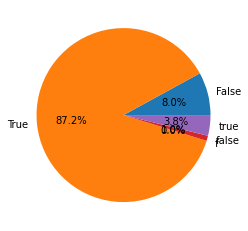

In [33]:
plt.pie(x=df2.counts, labels=df2.success, autopct='%1.1f%%')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



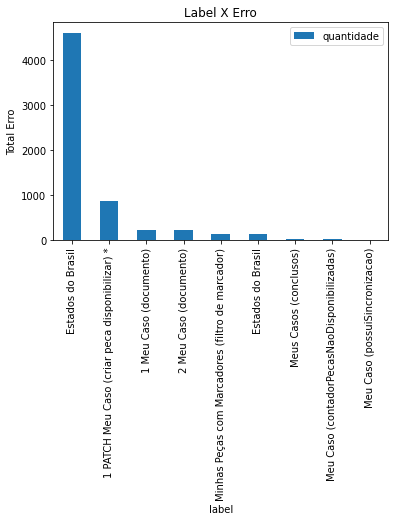

In [34]:
df2 = df.groupby(['label','success']).size().reset_index(name='quantidade')
df2[(df['success']==False)].sort_values(['quantidade'],ascending = (False)).plot(kind='bar', x='label', xlabel="label", ylabel="Total Erro", title="Label X Erro")

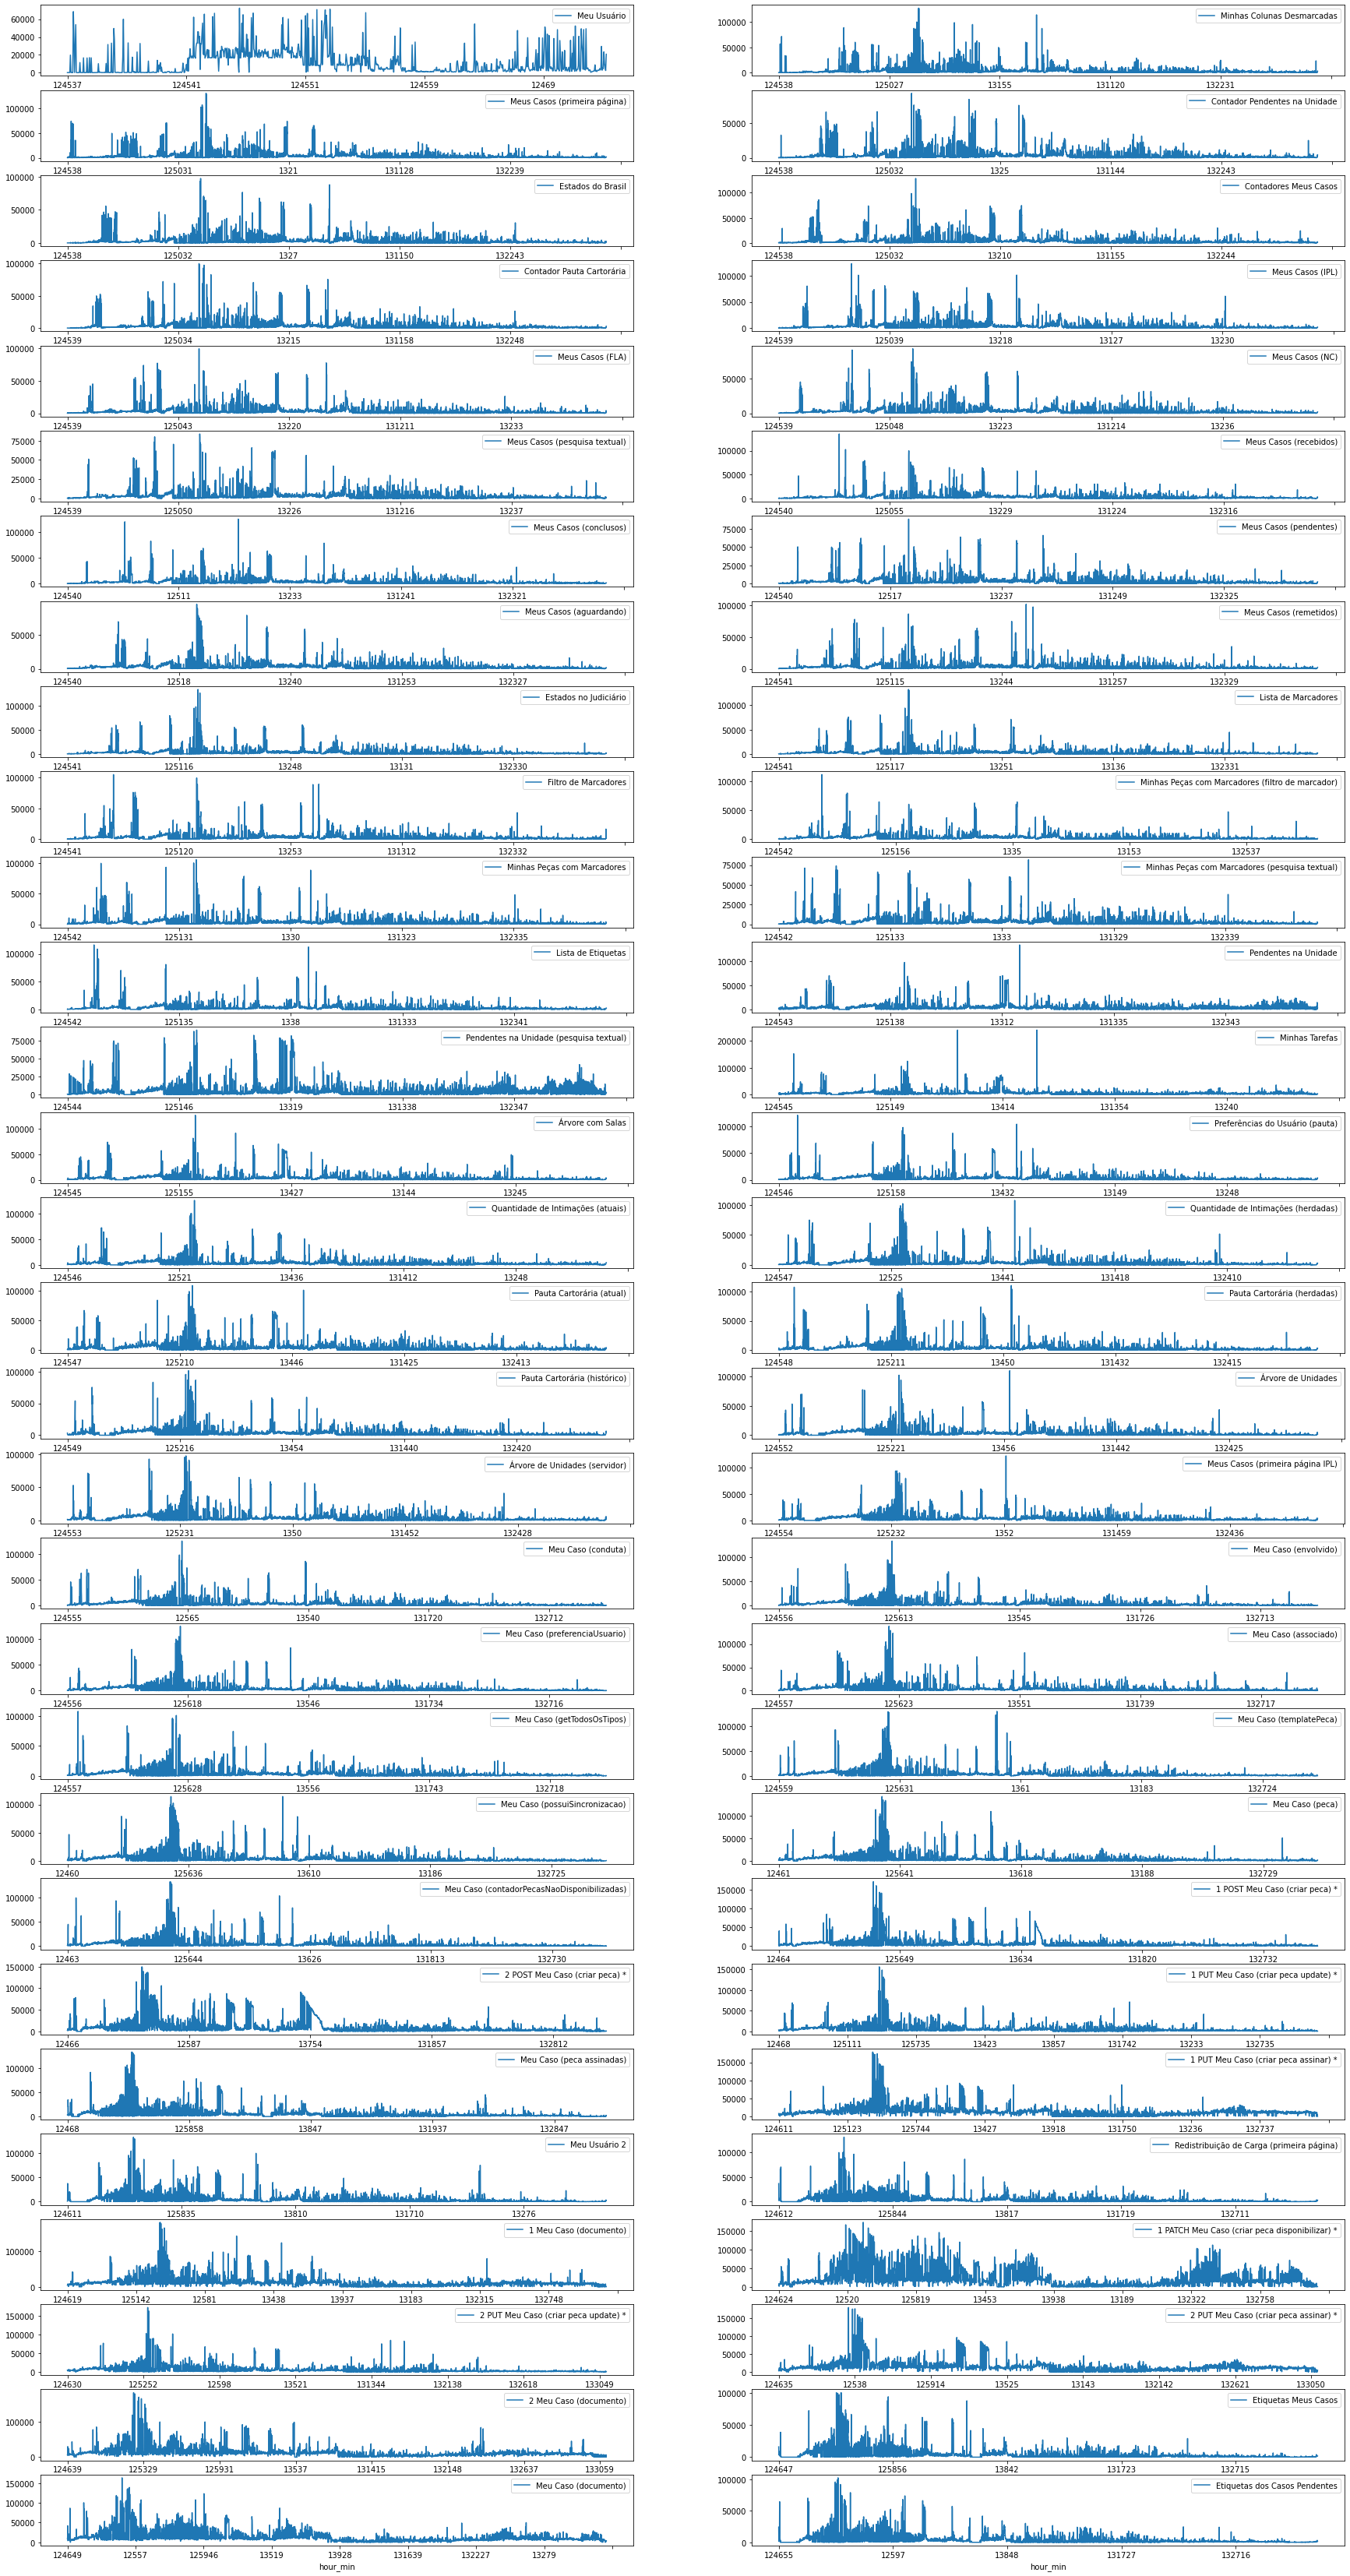

In [35]:
nrow=30
ncol=2
fig, axes = plt.subplots(nrow, ncol, figsize=(30,60))
count=1
for r in range(nrow):
    for c in range(ncol):
          #df[df['label']==df.label.unique()[count]].plot(ax=axes[r,c], kind='scatter', x='hour_min', y='Latency', label=df.label.unique()[count])
          df[df['label']==df.label.unique()[count]].plot(ax=axes[r,c], kind='line', x='hour_min', y='Latency', label=df.label.unique()[count])
          count+=1


In [135]:
#fig, ax = plt.subplots(figsize=(20,10))
#for key, grp in amostra.groupby(['label']):
#    ax = grp.plot(ax=ax, kind='scatter', x='timeStamp',c=np.random.rand(len(value_list),), y='Latency',marker="s", label=key)
#plt.legend(loc='best')
#plt.show()

In [136]:
df1 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_1.csv')
df2 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_2.csv')
df3 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_3.csv')
df4 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_4.csv')
df = pd.concat([df1, df2, df3, df4])

df.success.astype(str)
df.success.replace('False','false')
df.success.replace('f','false')
df.success.replace('True	','true	')
df['time'] = df['timeStamp'].values.astype(dtype='datetime64[ms]')
df['hour_min'] = df['time'].dt.hour.astype(dtype='str') + df['time'].dt.minute.astype(dtype='str')
df['minute'] = df['time'].dt.minute
df = df.sort_values(['timeStamp','label'],ascending = (True, True))
#df.columns

In [137]:
print(df.shape)
#df.head(1)

(263379, 20)


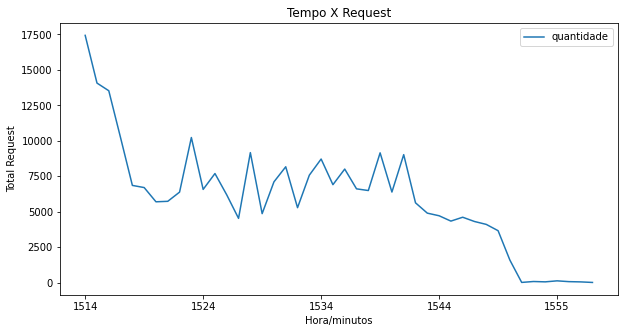

In [138]:
df2 = df.groupby(['hour_min']).size().reset_index(name='quantidade')
fig, ax = plt.subplots(figsize=(10,5))
ax = df2.plot(ax=ax, kind='line', x='hour_min', y='quantidade', xlabel="Hora/minutos", ylabel="Total Request", title="Tempo X Request")
plt.legend(loc='best')
plt.show()

In [139]:
df2 = df.groupby(['success']).size().reset_index(name='counts')
#df2.head()

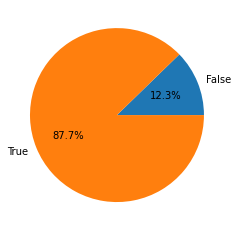

In [140]:
plt.pie(x=df2.counts, labels=df2.success, autopct='%1.1f%%')
plt.show()

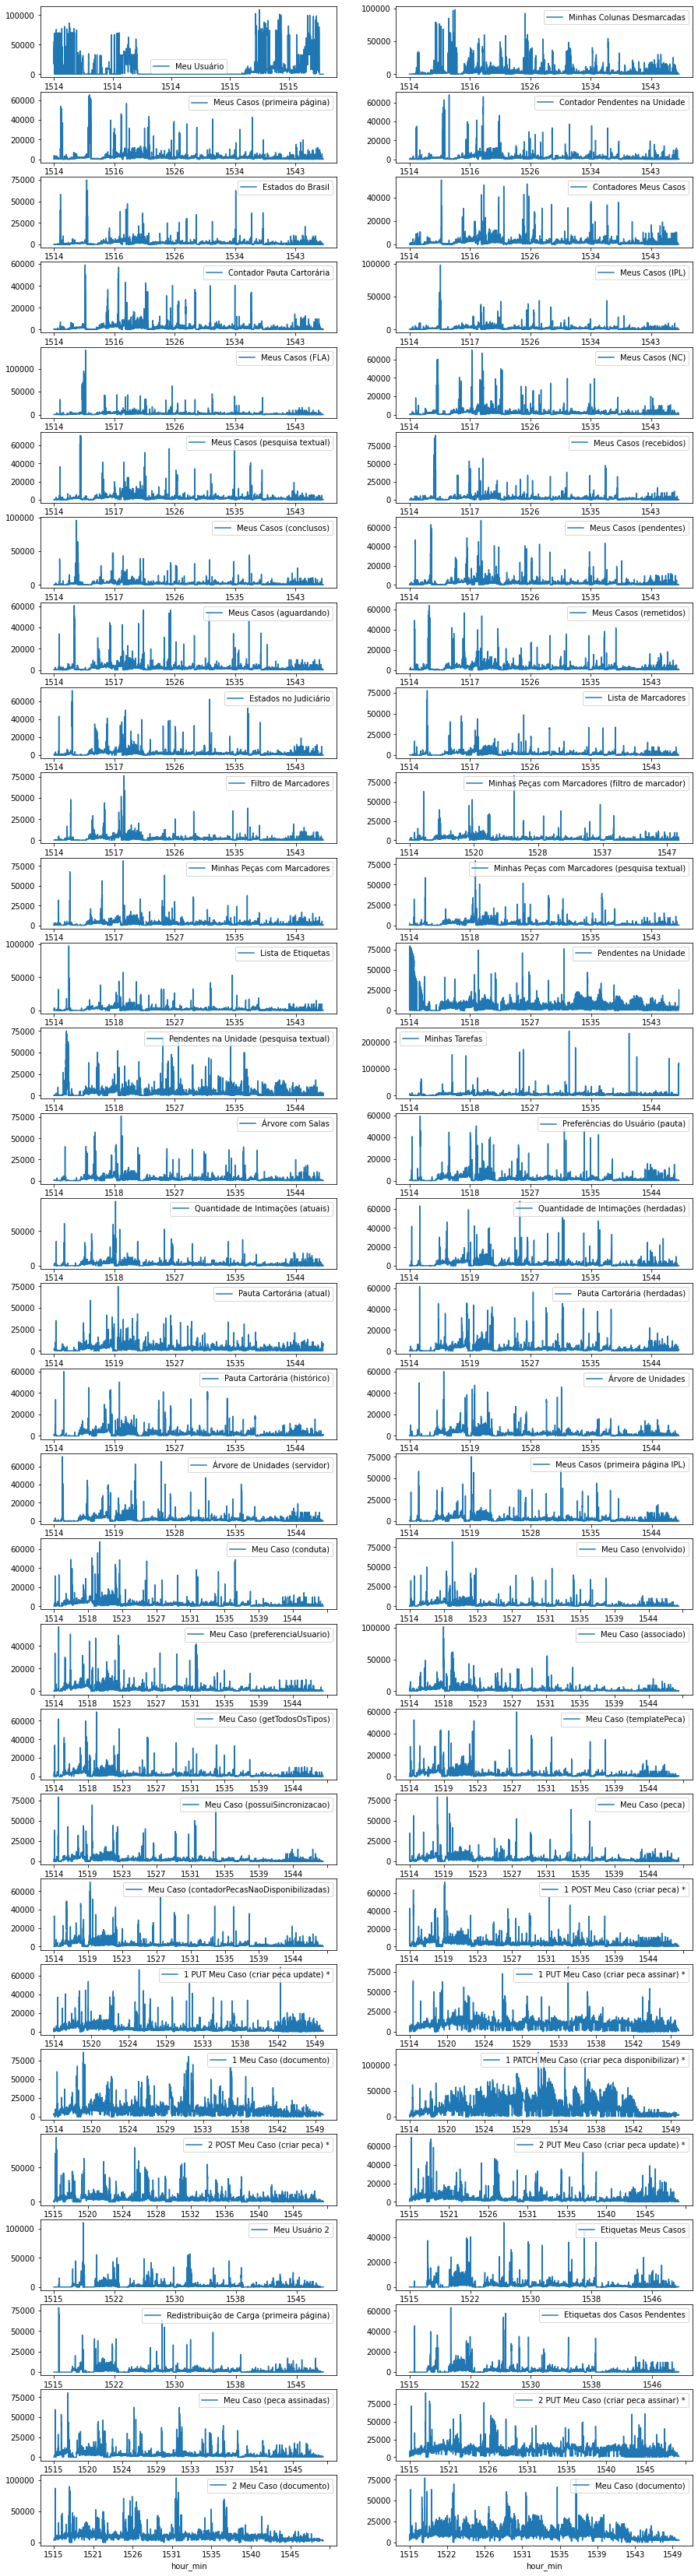

In [141]:
nrow=30
ncol=2
fig, axes = plt.subplots(nrow, ncol, figsize=(15,60))

count=1
for r in range(nrow):
    for c in range(ncol):
          #df[df['label']==df.label.unique()[count]].plot(ax=axes[r,c], kind='scatter', x='hour_min', y='Latency', label=df.label.unique()[count])
          df[df['label']==df.label.unique()[count]].plot(ax=axes[r,c], kind='line', x='hour_min', y='Latency', label=df.label.unique()[count])
          count+=1